In [1]:
import glob
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model


In [4]:
import os
os.chdir("C:/Users/Admin/Documents/myanimelist/")

In [5]:
Users = pd.read_csv("users_cleaned.csv", usecols=[0,1])
Anime = pd.read_csv("anime_cleaned.csv", usecols =[0,1,2,14,16])


In [6]:
# I do not wish to inculde any nudity or pornographic content
Anime_MPAA = Anime['rating'].value_counts()
Anime_MPAA

PG-13 - Teens 13 or older         3396
G - All Ages                      1046
R - 17+ (violence & profanity)     758
R+ - Mild Nudity                   566
PG - Children                      488
Rx - Hentai                        332
None                                82
Name: rating, dtype: int64

In [7]:
#Getting rid of the inappropriate content
Anime2 =Anime[Anime.rating !='Rx - Hentai']
Anime3 =Anime2[Anime.rating !='R+ - Mild Nudity']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
Anime3_MPAA = Anime3['rating'].value_counts()
Anime3_MPAA

PG-13 - Teens 13 or older         3396
G - All Ages                      1046
R - 17+ (violence & profanity)     758
PG - Children                      488
None                                82
Name: rating, dtype: int64

In [11]:
 #lets look at what our data looks like after we have cleaned the hentai and nudity from our anime list
Anime3.sort_values(by='scored_by', ascending=False, inplace=True)
Anime3

,anime_id,title,title_english,rating,scored_by
3802,1535,Death Note,Death Note,R - 17+ (violence & profanity),1009477
3897,16498,Shingeki no Kyojin,Attack on Titan,R - 17+ (violence & profanity),940211
3009,11757,Sword Art Online,Sword Art Online,PG-13 - Teens 13 or older,915986
1261,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,R - 17+ (violence & profanity),733592
4215,30276,One Punch Man,One Punch Man,R - 17+ (violence & profanity),691845
630,22319,Tokyo Ghoul,Tokyo Ghoul,R - 17+ (violence & profanity),659308
2199,20,Naruto,Naruto,PG-13 - Teens 13 or older,648605
6523,6547,Angel Beats!,Angel Beats!,PG-13 - Teens 13 or older,641851
6579,1575,Code Geass: Hangyaku no Lelouch,Code Geass: Lelouch of the Rebellion,R - 17+ (violence & profanity),627740
3108,19815,No Game No Life,"No Game, No Life",PG-13 - Teens 13 or older,623227


In [12]:
Anime4 = Anime3[:100]
# Anime4

In [13]:
#IT WILL TAKE A WHILE DONT DO IT
List = pd.read_csv("animelists_cleaned.csv",usecols =[0,1,5], nrows = 200000)
# x = pd.merge(Users, Anime, on = 'username', how='left')

In [14]:
List.columns

Index(['username', 'anime_id', 'my_score'], dtype='object')

In [15]:
# pd.set_option('display.max_columns', 20)
List.head(5)

,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7


In [16]:
#tells use the descr. stats. on users ratings the average user rated 287 anime series or films
user_count = List['username'].value_counts().reset_index()
user_count.columns = ['username','user_count']
user_count['user_count'].describe()

count     478.000000
mean      418.410042
std       402.476958
min         6.000000
25%       160.000000
50%       292.500000
75%       544.250000
max      3388.000000
Name: user_count, dtype: float64

In [17]:
#This one is useless just tells us the #of anime titles
anime_score = List['anime_id'].value_counts().reset_index()
anime_score.columns = ['my_score','anime_score']
anime_score['anime_score'].describe()

count    5931.000000
mean       33.721126
std        47.335480
min         1.000000
25%         5.000000
50%        15.000000
75%        43.000000
max       478.000000
Name: anime_score, dtype: float64

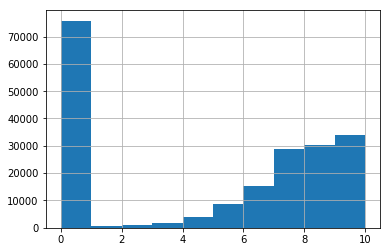

In [18]:
List["my_score"].hist(bins=10)

In [19]:
# list2 is made just to count the users ratings which we will use later
list2 = List['username'].value_counts()
# List.sort_values(by=count, ascending=False, inplace=True)

In [48]:
# list2

In [20]:
#lets make a top 100 users by count df
List3 = list2[:100]

In [21]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)
List3

MistButterfly      3388
ecoute             2958
Pullman            2921
Mitzia             2063
Navera             1888
ShinyShinigami     1832
tamer91            1813
IntroverTurtle     1784
Mono-no-aware      1736
Infernos           1699
Areq               1535
MrFreakMen         1446
magedgamed         1434
ShiroganeDx        1323
Raian-kun          1320
Sprite_Coke        1292
KuronekoSenpai     1281
Cursedflame        1247
darkpetr           1233
Gogeta_Animeka     1221
Konstantin         1207
Alpha_Norwegium    1189
LunarSonata        1183
Duke_On_Tree       1162
zombie_pegasus     1159
EvilGauche         1135
Yzui               1122
Shuhan             1120
KyousukeLove       1118
ShiroBernkastel    1114
                   ... 
ellowel             704
CrazyArty           691
ViewtifulFella      691
PiRhoManiac         686
anime-jesus         685
DennaKingKiller     683
Thay_Tsukiyomi      683
Volved              682
hurried             682
Sakurei             681
Anime_addicted  

In [63]:
#username	anime_id	my_score
#LETS RAMP IT UPPPPPP

In [22]:

from keras.models import Model
from keras.layers import Input
from keras.layers.core import Reshape
from keras.layers.merge import Multiply
from keras.layers.merge import Dot
from keras.layers.embeddings import Embedding
from keras import optimizers


C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [23]:
users = List.username.unique()
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}
animez = List.anime_id.unique()
animez_map = {i:val for i,val in enumerate(animez)}
inverse_animez_map = {val:i for i,val in enumerate(animez)}

List["username"] = List["username"].map(inverse_user_map)
List["old_id"] = List["anime_id"] # copying for join with metadata
List["anime_id"] = List["anime_id"].map(inverse_animez_map)

In [24]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# import pydot

user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')

embedding_size = 30
user_embedding = Embedding(output_dim=embedding_size, input_dim=users.shape[0],
                           input_length=1, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=embedding_size, input_dim=animez.shape[0],
                           input_length=1, name='item_embedding')(item_id_input)

user_vecs = Reshape([embedding_size])(user_embedding)
item_vecs = Reshape([embedding_size])(item_embedding)

y = Dot(1, normalize=False)([user_vecs, item_vecs])

model = Model(inputs=[user_id_input, item_id_input], outputs=y)

model.compile(loss='mse',
              optimizer="adam"
             )

In [25]:

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import pydot
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

from sklearn.model_selection import train_test_split

ratings_train, ratings_test = train_test_split(
    List, test_size=0.2, random_state=0)

In [41]:
import time
from keras.callbacks import ModelCheckpoint
mainpath = 'C:/Users/Admin/Documents/myanimelist'
save_path = mainpath + "/models"
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'matrix_facto_50_' + mytime 
thename = save_path + '/' + modname + '.h5'
mcheck = ModelCheckpoint(thename  , monitor='val_loss', save_best_only=True)

history = model.fit([ratings_train["username"], ratings_train["anime_id"]]
                    , ratings_train["my_score"]
                    , batch_size=64, epochs=10
                    , validation_split=0.1
                    , callbacks=[mcheck]
                    , shuffle=True)

import pickle
with open(mainpath + '/histories/' + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Train on 144000 samples, validate on 16000 samples
Epoch 1/10
144000/144000 [==============================] - 8s 56us/step - loss: 4.5547 - val_loss: 11.4742
Epoch 2/10
144000/144000 [==============================] - 7s 50us/step - loss: 4.3523 - val_loss: 11.6889
Epoch 3/10
144000/144000 [==============================] - 6s 39us/step - loss: 4.1714 - val_loss: 11.9026
Epoch 4/10
144000/144000 [==============================] - 5s 35us/step - loss: 4.0142 - val_loss: 12.1135
Epoch 5/10
144000/144000 [==============================] - 5s 35us/step - loss: 3.8765 - val_loss: 12.3357
Epoch 6/10
144000/144000 [==============================] - 5s 35us/step - loss: 3.7553 - val_loss: 12.5481
Epoch 7/10
144000/144000 [==============================] - 4s 30us/step - loss: 3.6463 - val_loss: 12.7524
Epoch 8/10
144000/144000 [==============================] - 4s 25us/step - loss: 3.5494 - val_loss: 12.9550
Epoch 9/10
144000/144000 [==============================] - 4s 25us/step - loss: 3.46

In [45]:
from keras.utils import plot_model
import seaborn
import matplotlib.pyplot as plt
from matplotlib import *
import sys
from pylab import *


,0,1,2,3,4,5,6,7,8,9
loss,8.072593,7.663270,7.245975,6.825267,6.423405,6.037044,5.677973,5.347401,5.051224,4.788146
val_loss,10.220801,10.221361,10.270841,10.338854,10.436505,10.546238,10.711767,10.881502,11.063743,11.262225


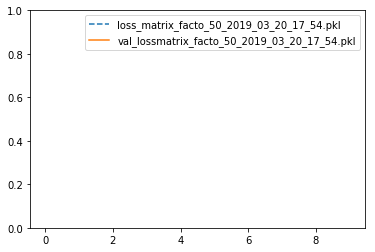

In [47]:
histories = ['matrix_facto_50_2019_03_20_17_54.pkl']

import pickle
mainpath = 'C:/Users/Admin/Documents/myanimelist'
for val in histories:
    with open(mainpath + '/histories/' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plot(thepickle["val_loss"],label='val_loss' + val)
plt.legend()
plt.ylim(0, 1)

pd.DataFrame(thepickle,columns =['loss','val_loss']).head(20).transpose()

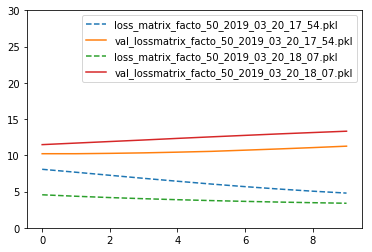

In [53]:
histories = ['matrix_facto_50_2019_03_20_17_54.pkl','matrix_facto_50_2019_03_20_18_07.pkl']

import pickle
mainpath = 'C:/Users/Admin/Documents/myanimelist'
for i,val in enumerate(histories):
    with open(mainpath + '/histories/' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plot(thepickle["loss"][:20],label ='loss_' + val,linestyle="--")
        plot(thepickle["val_loss"][:20],label='val_loss' + val)
plt.legend()
a= plt.ylim(0, 30)